In [ ]:
%conda create -n geo_env
%conda activate geo_env
%conda config --env --add channels conda-forge
%conda config --env --set channel_priority strict

In [39]:
%conda install python=3 geopandas

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%conda install python=3 fiona

In [ ]:
%conda install python=3 shapely

In [ ]:
%conda install python=3 pyproj

In [ ]:
%conda install python=3 packaging

In [ ]:
%conda install python=3 matplotlib

Namibia


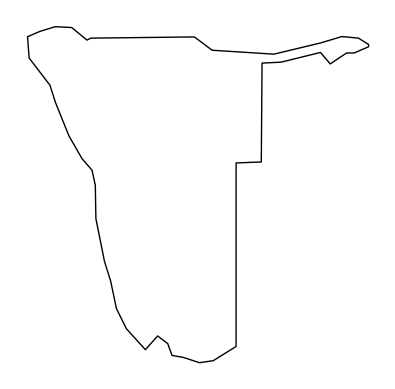

In [106]:
from unittest.mock import CallableMixin
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

cities = pd.read_csv('cities.csv', skipinitialspace = True)
#print(cities.head())

citiesgdf = geopandas.GeoDataFrame(
    cities, geometry=geopandas.points_from_xy(cities.Longitude, cities.Latitude))
#print(citiesgdf.head())

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.name=='Namibia'].plot(color='white', edgecolor='black', legend=True)
ax.set_axis_off()
citiesgdf=citiesgdf.set_crs('Namibia')
#citiesgdf.plot(ax=ax, c='blue', markersize=3),
#plt.show()
print(citiesgdf.crs)
citiesgdf.explore(
     column="City", # make choropleth based on "BoroName" column
     tooltip="City", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     #cmap="Set1", # use "Set1" matplotlib colormap

     #style_kwds=dict(color="black") # use black outline
     marker_kwds=dict(radius=2.5, fill=True)
    )
